In [1]:
import json
import networkx as nx
import matplotlib.pyplot as plt

### Graph of communications modelling

In [10]:
# Read the citation_relations.json file and generate a graph
with open('./data/citation_relations.json', 'r') as f:
    cite_data = json.load(f)

In [11]:
# Check if there are duplicate entries in the graph
node_set = set()
for paper_id in cite_data.keys():
    node_set.add(paper_id)
print(f"Duplicates count = {len(cite_data.keys()) - len(node_set)}")

Duplicates count = 0


In [12]:
# Create a list of nodes in the format expected by networkX
node_list = []
for paper_id in cite_data.keys():
    node_list.append({ 'id': paper_id })

In [13]:
link_list = []
for paper_id, paper_data in cite_data.items():
    for ref_paper_id in paper_data['references']:
        link_list.append({ 'source': paper_id, 'target': ref_paper_id })

In [14]:
graph_data = {
    'directed': True,
    'multigraph': False,
    'graph': {},
    'nodes': node_list,
    'links': link_list
}
cite_graph = nx.node_link_graph(graph_data)

In [15]:
cite_data["102498304"]

{'references': ['2362538', '119576823', '119330938', '29009489'],
 'cited_by': []}

### Graph of similarity of communications modelling

In [2]:
with open('./data/papers.SSN.jsonl', 'r') as f:
    papers = f.readlines()

In [3]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Implement TF-IDF on the paper abstracts
abstracts = []
for paper in papers:
    paper_data = json.loads(paper)
    abstracts.append(" ".join(paper_data['abstract']))

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
abstract_matrix = vectorizer.fit_transform(abstracts)

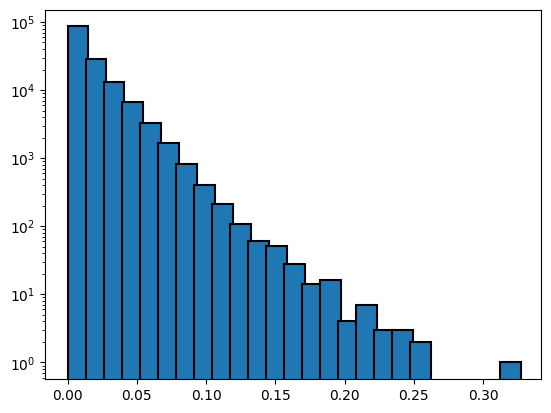

In [19]:
# Calculate the cosine similarity for the first 10000 papers
similarities = cosine_similarity(abstract_matrix[:10000], abstract_matrix)
similarities_arr = similarities.flatten()
similarities_arr = similarities_arr[similarities_arr < 0.99]

# Plot distribution of similarities
fig, ax = plt.subplots()
ax.hist(similarities_arr, bins=25, width=0.015, linewidth=1.5, edgecolor='black')
ax.semilogy()
plt.show()


In [18]:
# Create a list of links based on the cosine similarity in the format required by networkX
link_list = []
_MIN_SIMILARITY_THRESHOLD = 0.2
for source_node, source_data in enumerate(node_list):
    source_paper_id = source_data['id']
    similarities = cosine_similarity(abstract_matrix[source_node], abstract_matrix)
    similarities = similarities.flatten()
    for target_node, cos_sim in enumerate(similarities):
        if cos_sim > _MIN_SIMILARITY_THRESHOLD:
            target_paper_id = json.loads(papers[target_node])['paper_id']
            if target_paper_id != source_paper_id:
                link_list.append({ 'source': source_paper_id, 'target': target_paper_id, 'weight': cos_sim })

In [38]:
# Create a networkX graph for the similarity graph
similarity_graph_data = {
    'directed': False,
    'multigraph': False,
    'graph': {},
    'nodes': node_list,
    'links': link_list
}
similarity_graph = nx.node_link_graph(graph_data)

'{"paper_id": "4650265", "title": "XGBoost: A Scalable Tree Boosting System", "abstract": ["tree boosting is a highly effective and widely used machine learning method .", "in this paper , we describe a scalable end - to - end tree boosting system called xgboost , which is used widely by data scientists to achieve state - of - the - art results on many machine learning challenges .", "we propose a novel sparsity - aware algorithm for sparse data and weighted quantile sketch for approximate tree learning .", "more importantly , we provide insights on cache access patterns , data compression and sharding to build a scalable tree boosting system .", "by combining these insights , xgboost scales beyond billions of examples using far fewer resources than existing systems ."], "section_names": ["introduction", "tree boosting in a nutshell", "regularized learning objective", "gradient tree boosting", "shrinkage and column subsampling", "basic exact greedy algorithm", "approximate algorithm", 